<div style ="border: blue solid 5px; font-family: Agency FB;	"><center>
<a href="#" ></a> 
    <h1> <font color="blue">Analyse et Modélisation</font> </h1> 
<a href="#" ></a>     
</center>
</div>

## Table des matières

* [1. Chargement des packages](#1-chargement-des-packages)
* [2. Chargement de la base de données](#2-chargement-de-la-base-de-données)
* [3. Construction de la variable cible](#3-construction-de-la-variable-cible)
* [4. Détermination de l'échantillon de travail](#4-détermination-de-léchantillon-de-travail)
* [5. Analyse des liaisons avec la variable cible](#5-analyse-des-liaisons-avec-la-variable-cible)
* [6.Modèle de régression linéaire](#6-modèle-de-régression-linéaire)
* [7. Modèle Machine Learning](#7-modèle-machine-learning)
* [8. Evaluation des modèles](#8-evaluation-des-modèles)
* [9. Conclusion Modèle classique](#9-conclusion-modèle-classique)
* [10. Prédiction approche TOP DOWN](#10-prédiction-approche-top-down)
* [11. Enregistrement des prédictions pour la comparaison](#11-enregistrement-des-prédictions-pour-la-comparaison)


## 1. Chargement des packages

In [1]:
import pandas as pd
import numpy as np
import os 
import seaborn as sns

## Package graphique
from pandas_profiling import ProfileReport
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression

# Transformers
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV

# Modele
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

## Module pour la regression
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Metric d'evaluation
from sklearn.metrics import mean_squared_error

# Warning
import warnings
warnings.filterwarnings("ignore")

C:\Python\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## 2. Chargement de la base de données

[Début de page](#table-des-matières)

In [2]:
os.chdir("D:/01_ENSAI/Sem_2/Projet_Statistique/projet-risque-de-transition")

In [3]:
ASDES = pd.read_csv('bdd/Base_finale/ASDES_vf.csv')

In [4]:
ASDES.head(10)

,Sales_of_manufactured_products__Goods,Operating_Profit,Cashflow__Turnover_,Working_Capital__Turnover_days,Working_Capital_Needs__Turnover_,Export_,Added_Value_per_Employee_thousands,Capital_Employed__Fixed_Assets,Stock_Turnover_days,Collection_Period_days,...,TotalAsset,Transfers_of_charges,Turnover_per_employee,Type_of_business,VA_et_autres_prdts_charges_secteur,VAT,Wages_and_salaries,Working_capital,Working_capital_per_employee,Departement
0,0.0,7114225.4,2.857,45.875,36.530,0.1010,61.518171,1.9520,0.000,56.604,...,160833979.8,104316.0,142.064200,Manufacturer,85075.50,0.0,49132417.4,18990465.4,15.297792,59.0
1,0.0,-2278354.0,0.369,-29.676,23.971,23.6830,70.464860,0.8160,4.289,10.817,...,68413102.0,0.0,141.116957,Manufacturer,90475.90,3683100.0,35954873.0,-13577266.0,21.750185,57.0
2,368998755.0,13825047.0,8.575,73.110,37.909,15.1526,75.969765,1.1190,86.643,35.225,...,590037727.0,406409.0,195.895150,Subcontractor,268176.05,0.0,35227742.0,81320973.0,40.456800,34.0
3,170451900.0,8094010.0,5.711,7.486,41.812,0.1370,65.718576,1.0190,30.344,73.751,...,197235745.0,272931.0,195.949016,Subcontractor,223324.90,2760064.0,36949245.0,4714946.0,23.626723,74.0
4,254851717.0,8843418.0,5.894,-1.757,23.616,4.0620,106.198543,0.9940,31.373,40.265,...,128605645.0,0.0,457.594368,Subcontractor,258777.30,0.0,26306074.0,-1273340.0,20.873803,2.0
5,58533696.0,7824207.0,7.896,16.624,37.914,0.0000,66.120713,1.0650,12.021,88.819,...,112509100.0,0.0,134.042275,Undefined,76819.30,1483846.0,31982860.0,5242968.0,30.309997,59.0
6,0.0,4556727.0,2.244,134.743,64.428,0.0000,73.071528,1.1510,0.000,28.020,...,265805043.0,0.0,101.450486,Manufacturer,88496.80,1130.0,45652812.0,38503114.0,9.437345,59.0
7,352372.0,1612204.0,1.029,50.898,49.786,23.9390,79.448214,1.1606,9.056,119.357,...,81963397.0,5919.0,220.407722,Subcontractor,257467.00,0.0,28402274.0,20046929.0,14.398970,59.0
8,0.0,9561842.0,8.563,27.914,30.217,5.2380,102.393425,1.1590,67.229,52.590,...,184138831.0,0.0,234.501491,Contractor,216420.20,0.0,67006523.0,26474801.0,32.273321,82.0
9,0.0,2272155.0,8.893,96.692,16.035,0.0000,70.779559,1.7720,5.852,24.598,...,110201970.0,20834.0,140.464672,Manufacturer,66742.00,6949.0,7300978.0,63140773.0,6.083029,4.0


## 3. Construction de la variable cible

[Début de page](#table-des-matières)

In [5]:
# Scope 1 et 2
ASDES['Total_scope_1_2'] = ASDES['total_scope_1'] + ASDES['total_scope_2']
ASDES_2 = ASDES.copy()

<AxesSubplot:xlabel='square_Total_scope_1_2', ylabel='Density'>

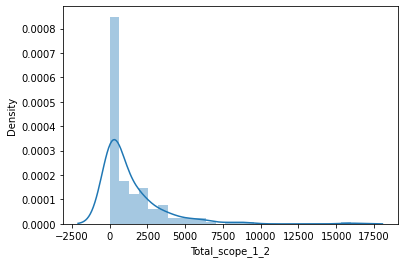

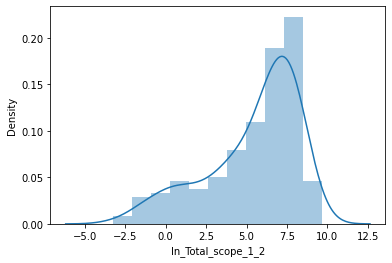

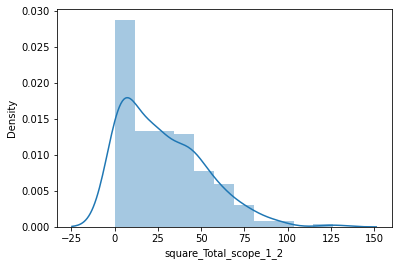

In [6]:
# Transformation de la variable cible
ASDES.loc[(ASDES["Total_scope_1_2"] == 0), 'Total_scope_1_2'] = 1
df_temp = ASDES.loc[ASDES.classe == "TPE/PME", ].copy()
plt.figure()
sns.distplot(df_temp["Total_scope_1_2"], kde=True, rug=False)
# Transformation logarithmique
df_temp["ln_Total_scope_1_2"] = np.log(df_temp["Total_scope_1_2"])
plt.figure()
sns.distplot(df_temp["ln_Total_scope_1_2"], kde=True, rug=False)
# Transformation racine  
df_temp["square_Total_scope_1_2"] = np.sqrt(df_temp["Total_scope_1_2"])
plt.figure()
sns.distplot(df_temp["square_Total_scope_1_2"], kde=True, rug=False)

In [7]:
## Description des différentes transformation
df_temp[["Total_scope_1_2", "ln_Total_scope_1_2", "square_Total_scope_1_2"]].describe()


,Total_scope_1_2,ln_Total_scope_1_2,square_Total_scope_1_2
count,203.000000,203.000000,203.000000
mean,1351.324641,5.391616,27.964952
std,2017.774583,2.851090,23.918703
min,0.039690,-3.226656,0.199223
25%,50.043500,3.912892,7.074142
50%,579.000000,6.361302,24.062419
75%,1932.647300,7.566642,43.961839
max,15970.896000,9.678523,126.376010


Nous allons donc choisir la modélisation avec la transformation logarithmique

In [8]:
ASDES['ln_Total_scope_1_2'] = np.log(ASDES['Total_scope_1_2'])


In [9]:
## Suppression des variables par secteur, variable d'identification et des sous scope
ASDES['Filiere'] = ASDES['secteur_secteur']
drop_list = [col for col in ASDES if ('secteur' in col) ]
drop_list = [*drop_list, 'total_scope_1', 'total_scope_2', 'total_scope_3',
 'codePostalEtablissement', 'assessment_id', 'codeCommuneEtablissement', 'APE_niv_1']

ASDES.drop(drop_list, axis=1, inplace=True)

## 4. Détermination de l'échantillon de travail

[Début de page](#table-des-matières)

La modélisation des émissions des GE et des TPE/PME ne peut pas se faire ensemble si les deux groupes ne sont pas homogènes au vu des observables. De ce fait dans cette partie nous cherchons à comparer ces deux groupes à travers les ratios. Nous avons beaucoup de raisons de croire que ces ratios pourraient rendre l'échantillon homogène du fait de la proportionnalité entre les certaines variables (ie. Chiffre d'affaire et nombre d'employés).

**Test d'homogénéité avec les ratios**

In [10]:
## Variables de type ratio
ratio_employee = [col for col in ASDES if ('per_emp' in col)]
ratio_turnover = [col for col in ASDES if ('_Turnover' in col) & ~('per_emp' in col)]
other_ratio = [col for col in ASDES if (('ratio' in col) | ('Ratio' in col)) & ~('per_emp' in col) & ~('_Turnover' in col)]
ratios = [*ratio_employee, *ratio_turnover, *other_ratio]
len(ratios)

23

Nous effectuons ici une observation des distributions des ratios dans les TPE/PME et dans l'échantillon des GE

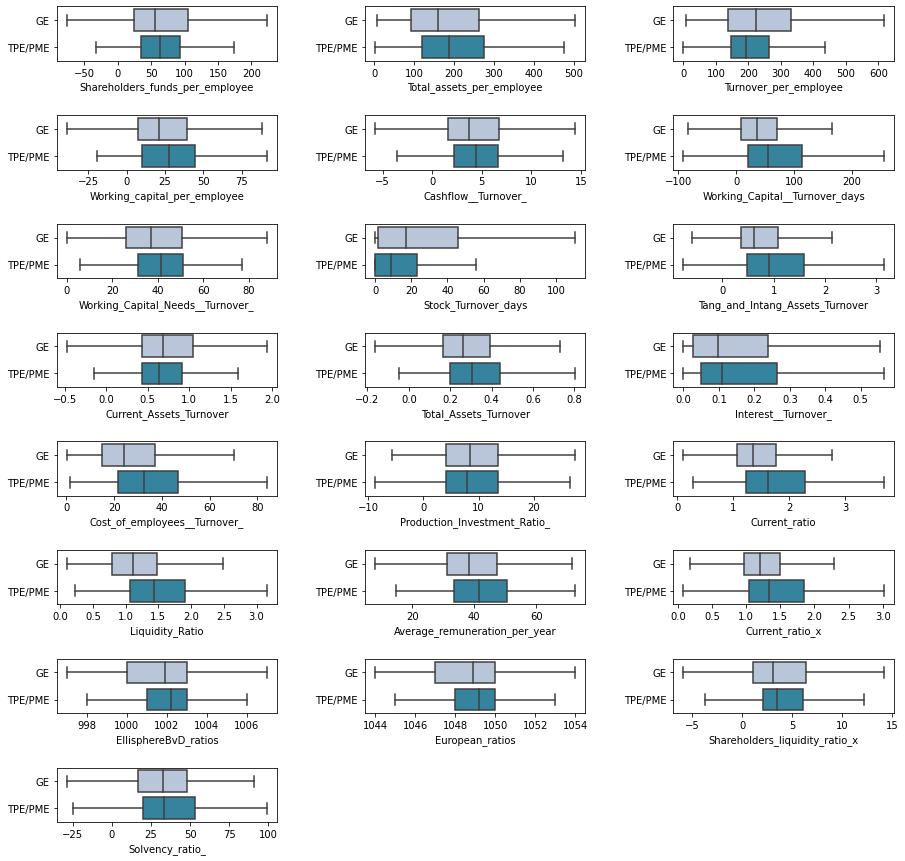

In [11]:
## Observation : Distribution ratio entre catégorie 
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=1, wspace=0.4)
for i in range(1, 23):
    ax = fig.add_subplot(8, 3, i)
    p= sns.boxplot(x=ASDES[ratios[i]], y = ASDES['classe'], palette='PuBuGn', orient='h',showfliers = False)
    p.set_ylabel('')
    p.set_xlabel(ratios[i])


Pour bon nombre de ratios on constate des distributions assez proche dans les deux groupes. C'est le cas pour les ratios tels que : cashflow/turnover, profit_per_employee, interest_per_turnover, etc. Afin de renforcer ce constat non exhaustif, nous allons procéder à des tests de comparaison de moyenne des différents ratios.

In [12]:
## Test d'homogénéité
from scipy import stats
f_value = []
p_value = []
for col in ratios:
   result_test = stats.ttest_ind(
      ASDES.loc[ASDES.classe=='TPE/PME', col],
      ASDES.loc[ASDES.classe=='GE', col]
   )
   f_value.append(result_test[0])
   p_value.append(result_test[1])

ratio_test_df = pd.DataFrame(
   {
      'ratios'  : ratios,
      'f_value' : f_value,
      'p_value' : p_value 
   }
)
print(   
   "Pour ", round((ratio_test_df.p_value > 0.05).mean()*100, 4), " % des variables les deux catégories sont homogènes"
)
ratio_test_df.loc[ratio_test_df.p_value > 0.05,]

Pour  30.4348  % des variables les deux catégories sont homogènes


,ratios,f_value,p_value
0,Profit_per_employee,-0.927614,0.353790
1,Shareholders_funds_per_employee,0.606718,0.544150
5,Cashflow__Turnover_,1.249879,0.211582
7,Working_Capital_Needs__Turnover_,1.698883,0.089595
12,Interest__Turnover_,1.189902,0.234315
14,Production_Investment_Ratio_,-0.706623,0.479935
21,Shareholders_liquidity_ratio_x,1.148483,0.250993


Nous constatons que pour plus de **`70% des variables`** de types ratios l'homogénéité des **`GE face au TPE/PME`** n'est pas acceptée. Il sera donc plus judicieux de ne considérer que l'échantillon des TPE/PME 

In [13]:
df_TPE = ASDES.drop('Total_scope_1_2', axis=1).query("classe == 'TPE/PME'").copy()
df_TPE.drop("classe", axis = 1, inplace=True)

## 5. Analyse des liaisons avec la variable cible

[Début de page](#table-des-matières)

In [14]:
# Selection selon le type
listCont = df_TPE.select_dtypes('number').columns.tolist()
listCateg = df_TPE.select_dtypes('object').columns.tolist()

**Analyse graphique**

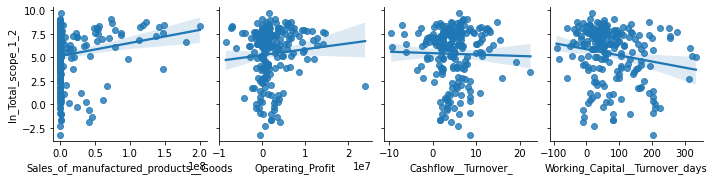

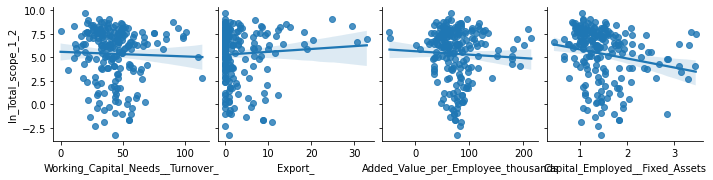

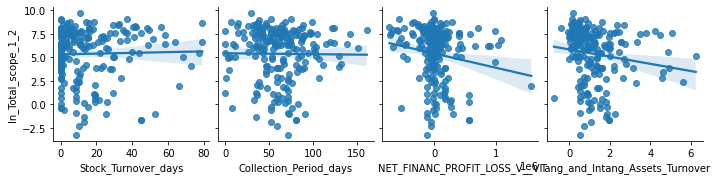

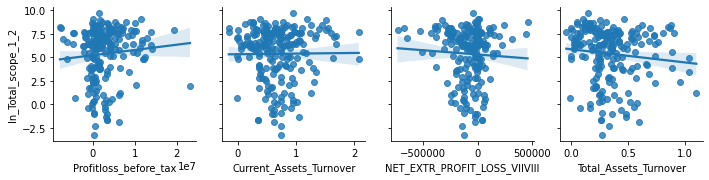

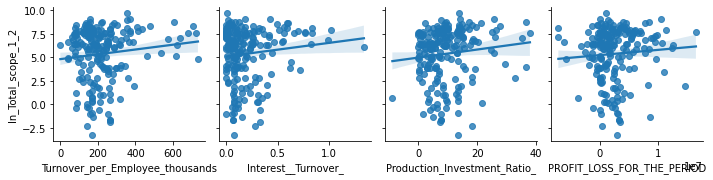

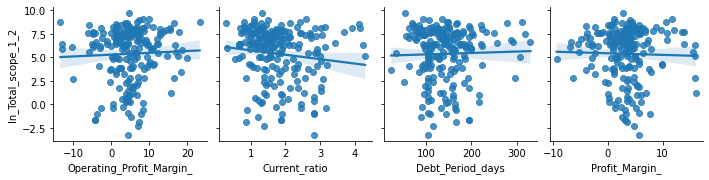

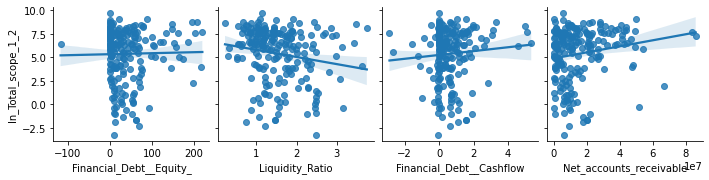

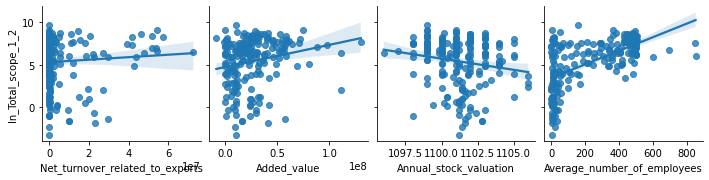

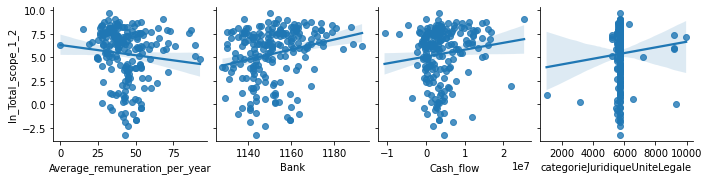

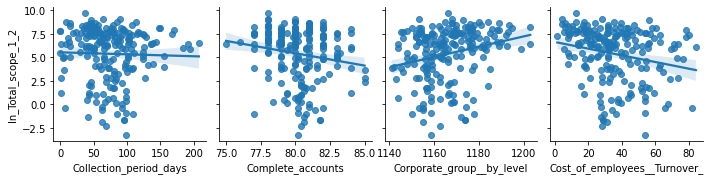

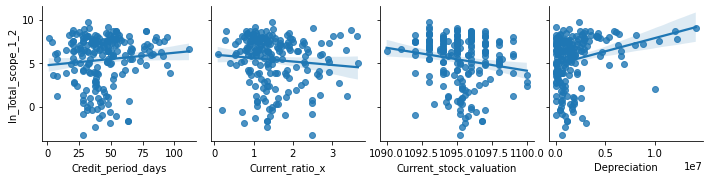

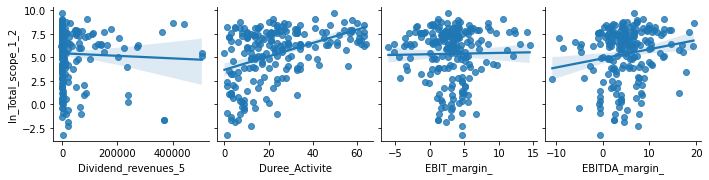

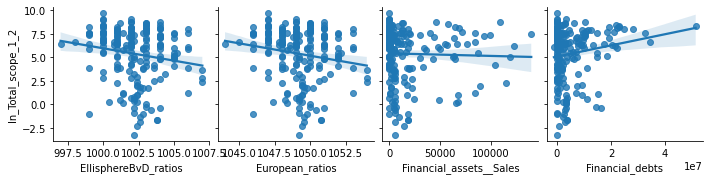

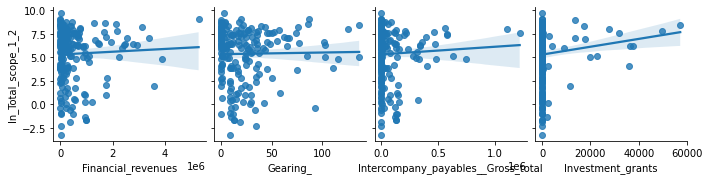

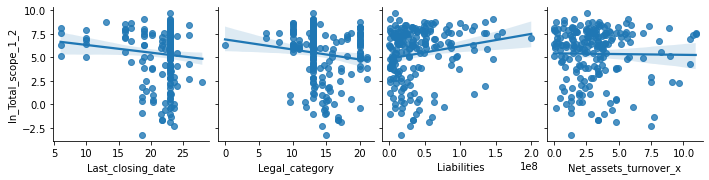

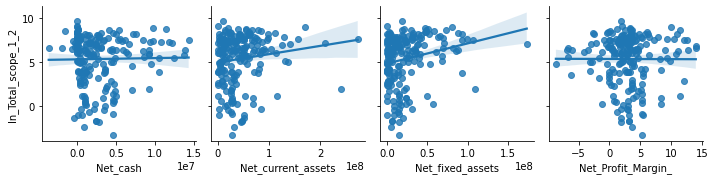

In [15]:
for i in range(0,61, 4):
   sns.pairplot(
      data = df_TPE,
      y_vars = 'ln_Total_scope_1_2',
      x_vars = listCont[i:i+4],
      kind = 'reg'
   )

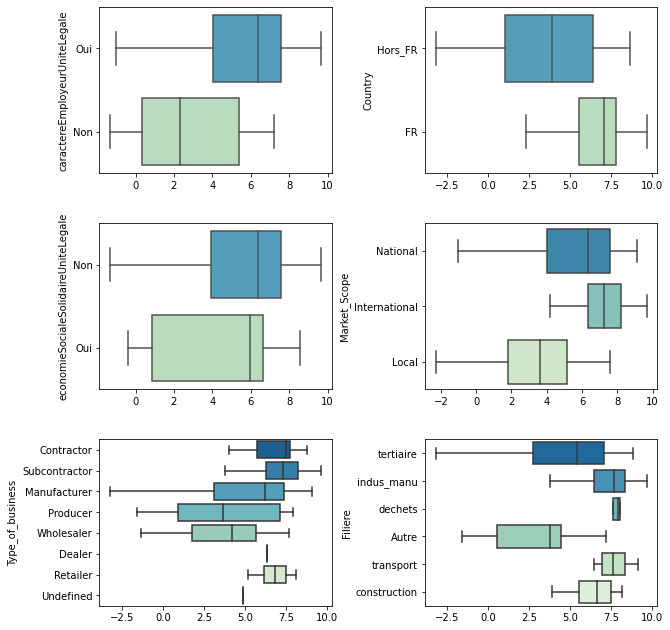

In [16]:
## Df des variables categorielle
listCateg = df_TPE.select_dtypes('object').columns.tolist()

fig = plt.figure(figsize=(10,15))
fig.subplots_adjust(hspace=0.3, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(4, 2, i)
    p= sns.boxplot(x=df_TPE['ln_Total_scope_1_2'], y = df_TPE[listCateg[i-1]], palette='GnBu_r', orient='h',showfliers = False)
    p.set_xlabel('')

#### Test de corrélation et Anova

**Etude des corrélations**

In [17]:
from sklearn.feature_selection import SelectKBest, f_regression, r_regression
fs = SelectKBest(score_func= f_regression, k = 'all')
rs = SelectKBest(score_func=r_regression, k = 'all')
X = df_TPE[listCont].drop('ln_Total_scope_1_2', axis=1)
## Selection
fs.fit_transform(X, df_TPE['ln_Total_scope_1_2'])
rs.fit_transform(X, df_TPE['ln_Total_scope_1_2'])

## Ranking
df_selection = pd.DataFrame({
   'variables' : fs.feature_names_in_,
   'Fisher' : fs.scores_,
   'Corrélation' : rs.scores_,
   'p_value_fisher' : fs.pvalues_
})
df_selection.sort_values(by='Fisher', ascending=False, inplace=True)

In [18]:
## Les variables les moins corrélées
df_selection.tail(15)

,variables,Fisher,Corrélation,p_value_fisher
24,Financial_Debt__Equity_,0.072222,0.018952,0.788404
46,EBIT_margin_,0.059959,0.017269,0.806810
53,Gearing_,0.059747,0.017238,0.807146
60,Net_cash,0.058366,0.017038,0.809344
105,Total_assets_per_employee,0.056120,0.016707,0.812978
69,No_of_recorded_subsidiaries,0.036169,-0.013413,0.849359
59,Net_assets_turnover_x,0.034657,-0.013130,0.852505
9,Collection_Period_days,0.022601,-0.010603,0.880651
68,No_of_recorded_shareholders,0.022601,0.010603,0.880651
99,Solvency_ratio_,0.018178,-0.009509,0.892886


In [19]:
## Variables plus corrélées
df_selection.loc[df_selection.p_value_fisher<=0.05].sort_values('Fisher', ascending=False, inplace=True)

df_selection.loc[df_selection.p_value_fisher<=0.05].to_latex('bdd/Latex/df_selection.tex', index=False)
df_selection.loc[df_selection.p_value_fisher<=0.05].head(15)

,variables,Fisher,Corrélation,p_value_fisher
31,Average_number_of_employees,107.707308,0.590676,1.763139e-20
45,Duree_Activite,46.080145,0.431855,1.249058e-10
86,reporting_year,39.845160,-0.406742,1.725154e-09
98,siret_count,15.353412,0.266392,1.221798e-04
43,Depreciation,13.510422,0.250963,3.043508e-04
38,Corporate_group__by_level,12.786788,0.244563,4.372485e-04
33,Bank,12.347184,0.240569,5.455438e-04
39,Cost_of_employees__Turnover_,11.035105,-0.228131,1.061978e-03
94,Share_capital,9.856665,0.216208,1.947047e-03
62,Net_fixed_assets,9.800023,0.215615,2.005025e-03


**Nous retenons toutes les variables significativement liées aux émissions**

In [20]:
quanti_1er_select = df_selection.loc[df_selection.p_value_fisher<=0.05, 'variables'].tolist()


Pour le cas de la modélisation linéaire cette liste sera encore plus affinée pour faciliter les interprétaions et éviter la multicolinéarité. Par contre pour les modèles de machine learning nous prendrons la liste **quanti_1er_select** en faisant tourné les algorithmes en recherchant les meilleurs prédicteurs.

**Test d'Anova**

Concernant les variables qualitatives cette première sélection sera appliquée à tous les modèles

In [21]:
## Observation des variables
listCateg = df_TPE.select_dtypes('object').columns
for col in listCateg:
   
   print(df_TPE[col].value_counts())
   print("======================================")

Oui    189
Non     14
Name: caractereEmployeurUniteLegale, dtype: int64
FR         126
Hors_FR     77
Name: Country, dtype: int64
Non    195
Oui      8
Name: economieSocialeSolidaireUniteLegale, dtype: int64
National         145
International     33
Local             25
Name: Market_Scope, dtype: int64
Manufacturer     94
Subcontractor    44
Wholesaler       23
Producer         16
Retailer         14
Contractor       10
Dealer            1
Undefined         1
Name: Type_of_business, dtype: int64
tertiaire       121
indus_manu       38
construction     17
transport        14
Autre             8
dechets           5
Name: Filiere, dtype: int64


In [22]:
## Recodage de la variable Type_of_business
mask_business = (df_TPE['Type_of_business'] == 'Dealer') | (df_TPE['Type_of_business'] == 'Undefined') 
df_TPE.loc[mask_business, 'Type_of_business'] = 'Retailer'

## caractereEmployeurUniteLegale et economieSocialeSolidaireUniteLegale variables quasi constantes
df_TPE.drop(['caractereEmployeurUniteLegale', 'categorieJuridiqueUniteLegale', 'economieSocialeSolidaireUniteLegale'], axis=1, inplace=True)


In [23]:
## Test anova
listCateg = df_TPE.select_dtypes('object').columns
import scipy.stats as stats

f_value_a = []
p_value_a = []
for col in listCateg:
   anov_test = stats.f_oneway(
   *(df_TPE.loc[df_TPE[col]==group, 'ln_Total_scope_1_2'] 
   for group in df_TPE[col].unique())
      )
   f_value_a.append(anov_test[0])
   p_value_a.append(anov_test[1])


anov_result = pd.DataFrame(
   {
      'variables': listCateg,
      'f_value': f_value_a,
      'p_value': p_value_a
   }
   )
anov_result.to_latex('bdd/Latex/Anova.tex', index=False)


In [24]:
quali_1er_select = anov_result.loc[anov_result.p_value<0.05, 'variables'].tolist()

In [25]:
## Variable issue du premier filtre
df_TPE = df_TPE[['ln_Total_scope_1_2', *quanti_1er_select, *quali_1er_select ]].copy()

## 6. Modèle de régression linéaire

[Début de page](#table-des-matières)

**Une deuxième sélection des quantitative par la méthode pas à pas : Forward selection**

Ici nous utilisons une méthode forward assez particulière. Nous optimisons le R2 ajusté tout en controlant la multicolinéarité

In [26]:
## Selection selon le R2 ajusté avec controle de la multicolinéarité
from selection_forward import forward_selected
model = forward_selected(data = df_TPE[['ln_Total_scope_1_2', *quanti_1er_select]], response = 'ln_Total_scope_1_2', criterion='adjr2')

In [27]:
#Variables choisies
selected_vars = []
for col in model.model.formula.split('+')[1:]:
   selected_vars.append(col.strip())
selected_vars

['Average_number_of_employees',
 'Duree_Activite',
 'reporting_year',
 'Tang_and_Intang_Assets_Turnover',
 'Cost_of_employees__Turnover_',
 'Added_value',
 'TOTAL_SHAREHOLDERS_FUNDS_I',
 'Stock_turnover_x',
 'Total__Gross_total',
 'TotalAsset',
 'Tangible_fixed_assets__Amount_at_start_of_period',
 'Share_capital',
 'NET_FINANC_PROFIT_LOSS_V__VI',
 'EBITDA_margin_',
 'TOTAL_LIABILITIES_AND_SHARE_CAPITAL',
 'Working_Capital__Turnover_days',
 'Net_fixed_assets',
 'TOTAL_REVENUES_I__III__V__VII',
 'TOTAL_OPERATING_REVENUES_2_I',
 'Financial_debts']

In [28]:
model2 = forward_selected(data = df_TPE[['ln_Total_scope_1_2', *selected_vars]], response = 'ln_Total_scope_1_2', criterion='aic')
forward_selection = []
for col in model2.model.formula.split('+')[1:]:
   forward_selection.append(col.strip())
forward_selection

['Average_number_of_employees',
 'Duree_Activite',
 'reporting_year',
 'Tang_and_Intang_Assets_Turnover',
 'Cost_of_employees__Turnover_',
 'Added_value',
 'TOTAL_SHAREHOLDERS_FUNDS_I',
 'Stock_turnover_x',
 'Total__Gross_total',
 'TotalAsset',
 'Tangible_fixed_assets__Amount_at_start_of_period',
 'Share_capital',
 'NET_FINANC_PROFIT_LOSS_V__VI']

**Etude des signes attendus sur les explicatives quantitatives**

Après observation de l'ACP on s'attendrait à un signe positif de tous les variables quantitatives choisies.

In [32]:
final_selection_quanti = [
 'Average_number_of_employees',
 'Duree_Activite',
 'EBITDA_margin_',
 'siret_count',
 'Sales_of_manufactured_products__Services',
 'Stock_turnover_x',
 'TotalAsset',
 'Purchases_of_raw_material'
]

<Figure size 720x720 with 0 Axes>

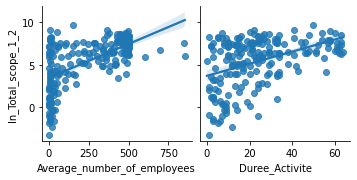

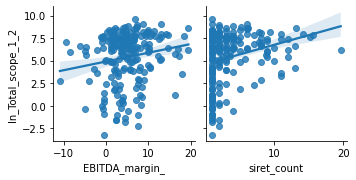

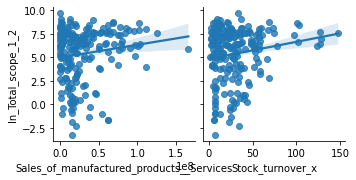

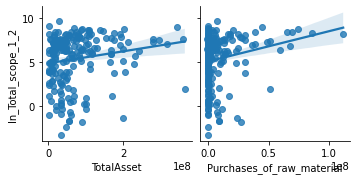

In [34]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.5, wspace=0.4)

for i in range(0,8, 2):
   sns.pairplot(
      data = df_TPE,
      y_vars = 'ln_Total_scope_1_2',
      x_vars = final_selection_quanti[i:i+2],
      kind = 'reg'
   )

Comme vu sur l'ACP, toutes les variables quantitatives présentent sont positivement liées aux émissions.

**Etude des signes attendus sur les explicatives qualitatives**

*Country*

<AxesSubplot:xlabel='ln_Total_scope_1_2', ylabel='Country'>

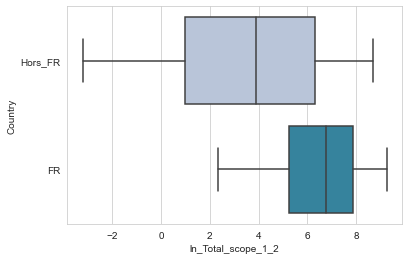

In [333]:
sns.boxplot(y=df_TPE['Country'], x = df_TPE['ln_Total_scope_1_2'], palette='PuBuGn', orient='h',showfliers = False)

les entreprises localisées en dehors de la France comptabilise moins de polution en moyenne. Cela peu être justifié par le fait que les entreprises manufacturière sont plus présentes en France.


In [334]:
pd.crosstab(df_TPE['Type_of_business'], df_TPE['Country'])

Country,FR,Hors_FR
Type_of_business,,
Contractor,4,6
Manufacturer,69,25
Producer,2,14
Retailer,14,2
Subcontractor,35,9
Wholesaler,2,21


*Market_Scope*

<AxesSubplot:xlabel='ln_Total_scope_1_2', ylabel='Market_Scope'>

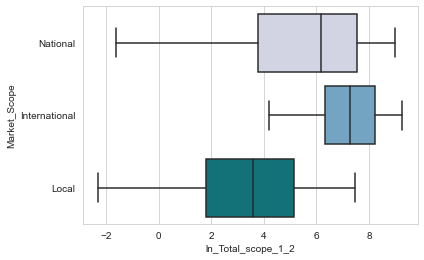

In [335]:
sns.boxplot(y=df_TPE['Market_Scope'], x = df_TPE['ln_Total_scope_1_2'], palette='PuBuGn', orient='h',showfliers = False)

Par rapport à la modalité Local, l'étendu du marché est positivement lié à la pollution. Ceci est plutôt logique car les entreprises ayant un marché local auront une activité moins intensif en carbone.

*Type_of_business*

<AxesSubplot:xlabel='ln_Total_scope_1_2', ylabel='Type_of_business'>

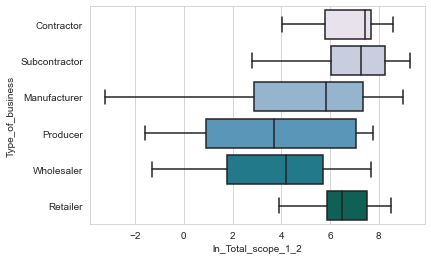

In [336]:
sns.boxplot(y=df_TPE['Type_of_business'], x = df_TPE['ln_Total_scope_1_2'], palette='PuBuGn', orient='h',showfliers = False)

Par rapport à la modalité *Producteur* le type d'activité est positivement liée au émission. 

*Filiere*

<AxesSubplot:xlabel='ln_Total_scope_1_2', ylabel='Filiere'>

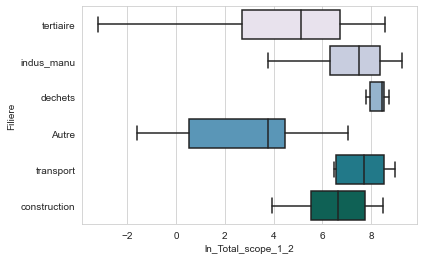

In [337]:
sns.boxplot(y=df_TPE['Filiere'], x = df_TPE['ln_Total_scope_1_2'], palette='PuBuGn', orient='h',showfliers = False)

<AxesSubplot:xlabel='ln_Total_scope_1_2', ylabel='Filiere'>

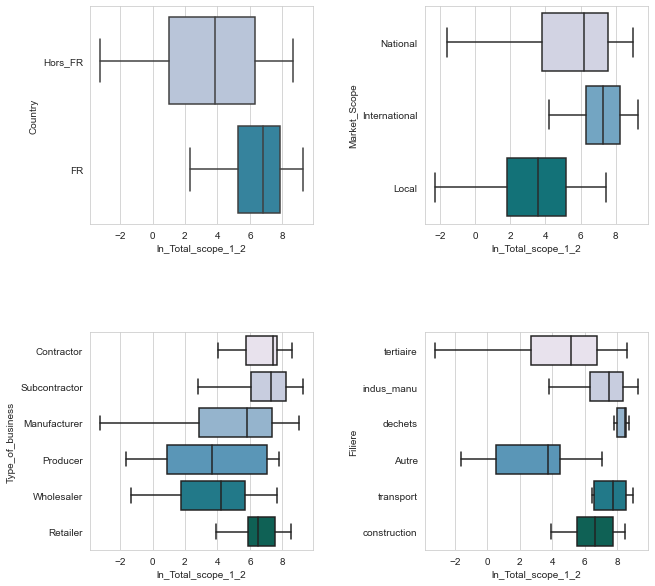

In [338]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

fig.add_subplot(2,2,1)
sns.boxplot(y=df_TPE['Country'], x = df_TPE['ln_Total_scope_1_2'], palette='PuBuGn', orient='h',showfliers = False)

fig.add_subplot(2,2,2)
sns.boxplot(y=df_TPE['Market_Scope'], x = df_TPE['ln_Total_scope_1_2'], palette='PuBuGn', orient='h',showfliers = False)

fig.add_subplot(2,2,3)
sns.boxplot(y=df_TPE['Type_of_business'], x = df_TPE['ln_Total_scope_1_2'], palette='PuBuGn', orient='h',showfliers = False)

fig.add_subplot(2,2,4)
sns.boxplot(y=df_TPE['Filiere'], x = df_TPE['ln_Total_scope_1_2'], palette='PuBuGn', orient='h',showfliers = False)


On constate que le secteur tertiaire concentre en moyenne les émissions les plus faibles

In [339]:
df_TPE[final_selection_quanti].describe()

,Average_number_of_employees,Duree_Activite,EBITDA_margin_,siret_count,Sales_of_manufactured_products__Services,Stock_turnover_x,TotalAsset,Wages_and_salaries,Purchases_of_raw_material
count,203.000000,203.000000,203.000000,203.000000,2.030000e+02,203.000000,2.030000e+02,2.030000e+02,2.030000e+02
mean,244.054187,23.800985,5.007351,3.511330,3.147386e+07,32.651460,7.840783e+07,1.404935e+07,1.170328e+07
std,211.129054,17.256602,5.082685,3.725377,3.303909e+07,26.937298,9.147699e+07,9.910854e+06,2.384679e+07
min,0.000000,0.000000,-10.873000,1.000000,0.000000e+00,1.189000,2.227730e+05,0.000000e+00,-7.949660e+05
25%,20.500000,10.000000,2.057000,1.000000,5.781363e+06,10.116000,1.930651e+07,7.044085e+06,5.575000e+02
50%,220.000000,21.000000,4.460000,2.000000,1.950079e+07,28.473000,4.818200e+07,1.357726e+07,9.048498e+05
75%,455.000000,33.000000,7.793500,4.000000,4.817185e+07,44.459700,1.006281e+08,1.896094e+07,8.963512e+06
max,852.000000,64.000000,19.457000,20.400000,1.407723e+08,147.618000,5.912735e+08,5.226857e+07,1.202255e+08


### Preprocessing

**Recodage des variables catégorielles**

In [36]:
cat = pd.get_dummies(df_TPE[quali_1er_select])
cat.drop(['Country_Hors_FR', 'Market_Scope_Local', 
'Type_of_business_Producer', 'Filiere_tertiaire'], axis = 1, inplace = True)
df_TPE.drop(quali_1er_select, inplace=True, axis = 1)
df_TPE[cat.columns] = cat

In [37]:
quanti_var = [var for var in final_selection_quanti]
quali_var = [col for col in cat.columns]

## Transformation des quantitatives
x = df_TPE[[*quanti_var, *quali_var]].copy()
y = df_TPE['ln_Total_scope_1_2']


x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.2, random_state = 2022)
x_train.reset_index(drop = True, inplace=True)
x_test.reset_index(drop = True, inplace=True)
y_train.reset_index(drop = True, inplace=True)
y_test.reset_index(drop = True, inplace=True)
x_train = sm.add_constant(x_train)
x_train["const"] = x_train["const"].astype('int')

### Modélisation


In [395]:

model0 = sm.OLS(y_train, x_train).fit()
result0 = model0.summary2()
result0

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
=======================================================================================
Model:                      OLS                      Adj. R-squared:           0.537   
Dependent Variable:         ln_Total_scope_1_2       AIC:                      681.5329
Date:                       2022-04-14 23:55         BIC:                      752.5477
No. Observations:           162                      Log-Likelihood:           -317.77 
Df Model:                   22                       F-statistic:              9.491   
Df Residuals:               139                      Prob (F-statistic):       2.14e-18
R-squared:                  0.600                    Scale:                    3.4497  
---------------------------------------------------------------------------------------
                                          Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
---------------------------------------------------------------------------------------
const                                     2.4502   0.7287  3.3622 0.0010  1.0093 3.8910
Average_number_of_employees               0.0054   0.0009  5.9207 0.0000  0.0036 0.0072
Duree_Activite                            0.0007   0.0111  0.0626 0.9502 -0.0212 0.0226
EBITDA_margin_                           -0.0155   0.0313 -0.4956 0.6210 -0.0773 0.0463
siret_count                               0.0548   0.0437  1.2538 0.2120 -0.0316 0.1412
Sales_of_manufactured_products__Services  0.0000   0.0000  0.3947 0.6937 -0.0000 0.0000
Stock_turnover_x                          0.0041   0.0067  0.6229 0.5344 -0.0090 0.0173
TotalAsset                                0.0000   0.0000  1.0998 0.2733 -0.0000 0.0000
Wages_and_salaries                       -0.0000   0.0000 -1.6682 0.0975 -0.0000 0.0000
Purchases_of_raw_material                 0.0000   0.0000  0.5144 0.6078 -0.0000 0.0000
Country_FR                                1.7571   0.4110  4.2751 0.0000  0.9444 2.5697
Market_Scope_International                0.0808   0.6702  0.1205 0.9042 -1.2443 1.4059
Market_Scope_National                    -0.0994   0.5001 -0.1988 0.8427 -1.0881 0.8893
Type_of_business_Contractor               1.1577   1.0174  1.1379 0.2571 -0.8538 3.1692
Type_of_business_Manufacturer            -0.5035   0.6521 -0.7721 0.4414 -1.7928 0.7859
Type_of_business_Retailer                 0.1209   1.2656  0.0955 0.9240 -2.3815 2.6233
Type_of_business_Subcontractor           -0.4486   0.9078 -0.4941 0.6220 -2.2435 1.3464
Type_of_business_Wholesaler               0.4857   0.7510  0.6466 0.5189 -0.9993 1.9706
Filiere_Autre                            -0.5282   0.7740 -0.6824 0.4961 -2.0585 1.0021
Filiere_construction                      0.4813   1.0229  0.4705 0.6388 -1.5413 2.5038
Filiere_dechets                           1.8569   1.0158  1.8280 0.0697 -0.1515 3.8652
Filiere_indus_manu                        1.8886   0.8463  2.2315 0.0272  0.2152 3.5619
Filiere_transport                         1.7650   0.6575  2.6844 0.0081  0.4650 3.0651
---------------------------------------------------------------------------------------
Omnibus:                    1.958              Durbin-Watson:                2.014     
Prob(Omnibus):              0.376              Jarque-Bera (JB):             1.665     
Skew:                       -0.068             Prob(JB):                     0.435     
Kurtosis:                   3.478              Condition No.:                1538608772
=======================================================================================
* The condition number is large (2e+09). This might indicate             strong
multicollinearity or other numerical problems.
"""

**Vif du modèle 0**

In [396]:
## Testons la multicolinéarité
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif_data = pd.DataFrame() 
vif_data["variable"] = x_train.iloc[:, 1:].columns 
vif_data["VIF"] = [variance_inflation_factor(x_train.iloc[:, 1:].values, i) 
                          for i in range(len(x_train.iloc[:, 1:].columns))] 
vif_data.sort_values(by = 'VIF', ascending=False)

,variable,VIF
7,Wages_and_salaries,7.622504
11,Market_Scope_National,7.369197
14,Type_of_business_Retailer,6.365125
15,Type_of_business_Subcontractor,6.270141
20,Filiere_indus_manu,6.112084
1,Duree_Activite,5.317760
13,Type_of_business_Manufacturer,5.216773
18,Filiere_construction,5.156272
9,Country_FR,4.984816
0,Average_number_of_employees,4.401177


In [397]:
#Suppression de certaines variables du modèle
var_cor = [
   "Wages_and_salaries", 
   *[col for col in x_train.columns if ('Market_Scope' in col)| ('Type_of_business' in col)]
]

#var_cor = vif_data.loc[vif_data.VIF>5, "variable"]

x_train.drop(var_cor, axis=1, inplace=True)

**Modèle sans les variables fortement corrélées**

In [398]:
model1 = sm.OLS(y_train, x_train).fit()
result1 = model1.summary2()
result1

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
=======================================================================================
Model:                      OLS                      Adj. R-squared:           0.528   
Dependent Variable:         ln_Total_scope_1_2       AIC:                      677.6865
Date:                       2022-04-14 23:55         BIC:                      724.0004
No. Observations:           162                      Log-Likelihood:           -323.84 
Df Model:                   14                       F-statistic:              13.87   
Df Residuals:               147                      Prob (F-statistic):       1.37e-20
R-squared:                  0.569                    Scale:                    3.5161  
---------------------------------------------------------------------------------------
                                          Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
---------------------------------------------------------------------------------------
const                                     1.9636   0.3914  5.0169 0.0000  1.1901 2.7371
Average_number_of_employees               0.0050   0.0008  6.0079 0.0000  0.0034 0.0067
Duree_Activite                            0.0069   0.0107  0.6487 0.5176 -0.0142 0.0280
EBITDA_margin_                           -0.0140   0.0310 -0.4527 0.6514 -0.0753 0.0472
siret_count                               0.0592   0.0425  1.3942 0.1654 -0.0247 0.1431
Sales_of_manufactured_products__Services -0.0000   0.0000 -0.5340 0.5942 -0.0000 0.0000
Stock_turnover_x                          0.0020   0.0066  0.2983 0.7659 -0.0111 0.0150
TotalAsset                                0.0000   0.0000  1.4318 0.1543 -0.0000 0.0000
Purchases_of_raw_material                 0.0000   0.0000  0.0255 0.9797 -0.0000 0.0000
Country_FR                                1.6357   0.3487  4.6904 0.0000  0.9465 2.3249
Filiere_Autre                            -0.5480   0.7494 -0.7313 0.4658 -2.0289 0.9329
Filiere_construction                      0.8553   0.5506  1.5536 0.1224 -0.2327 1.9434
Filiere_dechets                           1.6407   1.0058  1.6312 0.1050 -0.3471 3.6285
Filiere_indus_manu                        1.6298   0.6039  2.6987 0.0078  0.4363 2.8233
Filiere_transport                         1.5525   0.6564  2.3650 0.0193  0.2552 2.8497
---------------------------------------------------------------------------------------
Omnibus:                     1.503              Durbin-Watson:                1.961    
Prob(Omnibus):               0.472              Jarque-Bera (JB):             1.154    
Skew:                        -0.017             Prob(JB):                     0.562    
Kurtosis:                    3.412              Condition No.:                902260990
=======================================================================================
* The condition number is large (9e+08). This might indicate             strong
multicollinearity or other numerical problems.
"""

**Vif du modèle 1**

In [399]:
vif_data = pd.DataFrame() 
vif_data["variable"] = x_train.iloc[:, 1:].columns 
vif_data["VIF"] = [variance_inflation_factor(x_train.iloc[:, 1:].values, i) 
                          for i in range(len(x_train.iloc[:, 1:].columns))] 
vif_data.sort_values(by = 'VIF', ascending=False)

,variable,VIF
1,Duree_Activite,4.609884
0,Average_number_of_employees,3.600027
4,Sales_of_manufactured_products__Services,3.392539
5,Stock_turnover_x,3.291841
8,Country_FR,3.175435
12,Filiere_indus_manu,3.109748
7,Purchases_of_raw_material,2.596888
3,siret_count,2.390739
6,TotalAsset,2.246174
2,EBITDA_margin_,2.021201


**Validation du modèle**

*Valeurs aberrantes*

Sur le graphique suivant sont représentés en ordonnée les résidus studentisés pour chaque individus. Les lignes en pointillés vertes représentent le seuil d'une lois de Student à un niveau de confiance de 95%.

Text(0.5, 1.0, 'Représentation des résidus en fonction des individus')

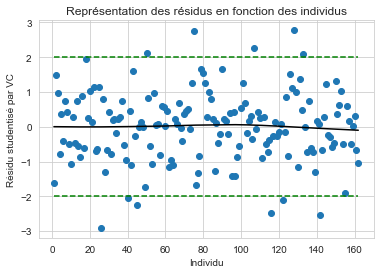

In [400]:
## Résidu studentisé
n = len(x_train)


from statsmodels.nonparametric.smoothers_lowess import lowess # pour le lissage
from statsmodels.stats.outliers_influence import OLSInfluence # pour récupérer les résidus studentisés

influ = OLSInfluence(model1)
x = np.linspace(1,n,n)
y = np.repeat(2,n)
fig, ax = plt.subplots()

ax.scatter(x,influ.resid_studentized_external)
ax.plot(x,y,linestyle='dashed',color='green')
ax.plot(x,-y,linestyle='dashed',color='green')

filtered = lowess(influ.resid_studentized_external,x)
ax.plot(filtered[:,0],filtered[:,1],color='black')
ax.set_xlabel("Individu")
ax.set_ylabel("Résidu studentisé par VC")
ax.set_title("Représentation des résidus en fonction des individus") 

In [401]:
## Observation des aberrants
outliers = x_train.iloc[np.where(np.abs(influ.resid_studentized_external) > 2)].index
outliers
x_train.iloc[outliers]

,const,Average_number_of_employees,Duree_Activite,EBITDA_margin_,siret_count,Sales_of_manufactured_products__Services,Stock_turnover_x,TotalAsset,Purchases_of_raw_material,Country_FR,Filiere_Autre,Filiere_construction,Filiere_dechets,Filiere_indus_manu,Filiere_transport
25,1,501.0,21.0,10.5060,4.0,43074696.0,126.5930,43837538.0,5817043.0,1,0,0,0,0,1
39,1,9.0,3.0,2.3750,2.0,61700265.4,6.5964,53541807.0,8867320.6,0,0,0,0,0,0
44,1,5.0,5.0,4.5498,1.0,15187423.8,22.7612,88833644.6,27384436.8,0,0,0,0,0,0
49,1,3.0,3.0,5.1688,1.0,18595689.4,12.3412,11056842.8,904849.8,0,0,0,0,0,0
74,1,58.0,2.0,6.1258,1.0,24978687.8,28.9350,11056842.8,13056668.0,0,0,0,0,0,0
106,1,12.0,5.0,4.3170,1.2,10457255.0,42.9894,95565546.2,0.0,1,0,0,0,0,0
115,1,41.0,9.0,-5.0610,1.0,3419098.0,26.5734,34886498.0,0.0,1,0,0,0,0,0
121,1,7.0,3.0,4.5660,1.0,37456748.8,25.1298,198647603.2,24042137.6,0,0,0,0,0,0
127,1,2.0,2.0,5.0224,1.0,17455011.0,57.5772,50150842.2,3326264.8,0,0,0,0,0,0
132,1,18.0,10.0,4.2444,2.0,2442432.0,2.1210,18810076.0,0.0,1,0,0,0,0,0


Testons la qualité d'ajustement lorsque ces individus sont supprimés de l'échantillon

**Modèle sans les influenceurs**

In [402]:
x_train_f = x_train.drop(outliers, axis = 0)
y_train_f = y_train.drop(outliers, axis = 0)


model2 = sm.OLS(y_train_f, x_train_f).fit()
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
=======================================================================================
Model:                      OLS                      Adj. R-squared:           0.638   
Dependent Variable:         ln_Total_scope_1_2       AIC:                      565.9198
Date:                       2022-04-14 23:55         BIC:                      611.1790
No. Observations:           151                      Log-Likelihood:           -267.96 
Df Model:                   14                       F-statistic:              19.88   
Df Residuals:               136                      Prob (F-statistic):       2.26e-26
R-squared:                  0.672                    Scale:                    2.2612  
---------------------------------------------------------------------------------------
                                          Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
---------------------------------------------------------------------------------------
const                                     1.8360   0.3392  5.4128 0.0000  1.1652 2.5068
Average_number_of_employees               0.0051   0.0007  7.4750 0.0000  0.0038 0.0065
Duree_Activite                            0.0079   0.0087  0.9010 0.3692 -0.0094 0.0251
EBITDA_margin_                           -0.0227   0.0254 -0.8934 0.3732 -0.0728 0.0275
siret_count                               0.0570   0.0343  1.6633 0.0986 -0.0108 0.1247
Sales_of_manufactured_products__Services -0.0000   0.0000 -0.3665 0.7146 -0.0000 0.0000
Stock_turnover_x                          0.0042   0.0056  0.7571 0.4503 -0.0068 0.0152
TotalAsset                                0.0000   0.0000  1.9418 0.0542 -0.0000 0.0000
Purchases_of_raw_material                 0.0000   0.0000  0.4017 0.6885 -0.0000 0.0000
Country_FR                                1.5805   0.2907  5.4368 0.0000  1.0056 2.1554
Filiere_Autre                            -0.5276   0.6088 -0.8667 0.3876 -1.7316 0.6763
Filiere_construction                      0.7757   0.4449  1.7435 0.0835 -0.1041 1.6555
Filiere_dechets                           1.4508   0.8081  1.7952 0.0748 -0.1474 3.0490
Filiere_indus_manu                        1.5813   0.4886  3.2363 0.0015  0.6150 2.5475
Filiere_transport                         1.9846   0.5449  3.6422 0.0004  0.9071 3.0622
---------------------------------------------------------------------------------------
Omnibus:                    1.326              Durbin-Watson:                 1.994    
Prob(Omnibus):              0.515              Jarque-Bera (JB):              1.176    
Skew:                       0.019              Prob(JB):                      0.555    
Kurtosis:                   2.569              Condition No.:                 891766109
=======================================================================================
* The condition number is large (9e+08). This might indicate             strong
multicollinearity or other numerical problems.
"""

Meilleur ajustement

**Normalité des résidus**

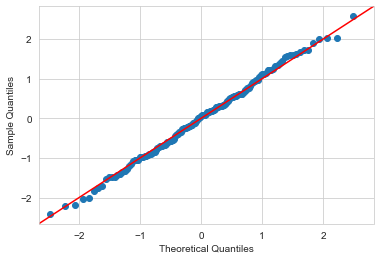

In [403]:
influ2 = OLSInfluence(model2)
fig = sm.qqplot(influ2.resid_studentized_external,line='45')


**Homocédasticité**

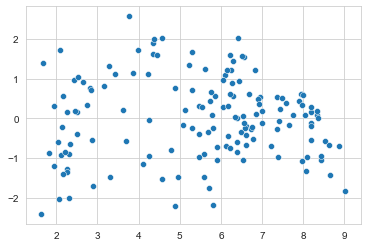

In [404]:
plt.figure()
ax = sns.scatterplot(model2.fittedvalues, influ2.resid_studentized_external)


On voit qu'il n'y a pas de forme particulière donc nous admettons l'homocédasticité

**Modèle sans les variables avec coefficients null**

In [405]:
var_coef_null = [ 
   "Sales_of_manufactured_products__Services",
   "TotalAsset",
   "Purchases_of_raw_material",
   "EBITDA_margin_",
   "siret_count",
   "Filiere_Autre",
   "Filiere_construction",
   "Filiere_dechets"
]
x_train_f.drop(var_coef_null, axis=1, inplace=True)

In [406]:
model3 = sm.OLS(y_train_f, x_train_f).fit()
model3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
========================================================================
Model:                 OLS                 Adj. R-squared:      0.619   
Dependent Variable:    ln_Total_scope_1_2  AIC:                 566.3717
Date:                  2022-04-14 23:56    BIC:                 587.4926
No. Observations:      151                 Log-Likelihood:      -276.19 
Df Model:              6                   F-statistic:         41.56   
Df Residuals:          144                 Prob (F-statistic):  4.15e-29
R-squared:             0.634               Scale:               2.3814  
------------------------------------------------------------------------
                            Coef.  Std.Err.   t    P>|t|   [0.025 0.975]
------------------------------------------------------------------------
const                       1.7400   0.3047 5.7105 0.0000  1.1377 2.3422
Average_number_of_employees 0.0054   0.0007 8.1252 0.0000  0.0041 0.0068
Duree_Activite              0.0184   0.0082 2.2437 0.0264  0.0022 0.0347
Stock_turnover_x            0.0090   0.0052 1.7380 0.0843 -0.0012 0.0192
Country_FR                  1.6252   0.2811 5.7820 0.0000  1.0697 2.1808
Filiere_indus_manu          1.5097   0.3706 4.0736 0.0001  0.7772 2.2422
Filiere_transport           1.8747   0.5176 3.6220 0.0004  0.8516 2.8977
------------------------------------------------------------------------
Omnibus:                0.637           Durbin-Watson:             1.939
Prob(Omnibus):          0.727           Jarque-Bera (JB):          0.734
Skew:                   -0.011          Prob(JB):                  0.693
Kurtosis:               2.659           Condition No.:             1433 
========================================================================
* The condition number is large (1e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

**Testons le modèle avec les termes quadratiques**

In [407]:
x_train_2 = x_train_f.copy()
for x in x_train_2.select_dtypes('float').columns:
   var = x+'2'
   x_train_2[var] = x_train_2[x]**2
   

In [408]:
## Modèle avec terme quadraditique
x_train_2.drop(["Stock_turnover_x2", "Average_number_of_employees2"], axis = 1, inplace=True)
model_quad = sm.OLS(y_train_f, x_train_2).fit()
model_quad.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
==========================================================================
Model:                 OLS                  Adj. R-squared:       0.623   
Dependent Variable:    ln_Total_scope_1_2   AIC:                  565.4280
Date:                  2022-04-14 23:56     BIC:                  589.5663
No. Observations:      151                  Log-Likelihood:       -274.71 
Df Model:              7                    F-statistic:          36.48   
Df Residuals:          143                  Prob (F-statistic):   7.16e-29
R-squared:             0.641                Scale:                2.3517  
--------------------------------------------------------------------------
                             Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
--------------------------------------------------------------------------
const                        1.3300   0.3891  3.4183 0.0008  0.5609 2.0991
Average_number_of_employees  0.0053   0.0007  7.8383 0.0000  0.0039 0.0066
Duree_Activite               0.0642   0.0284  2.2554 0.0256  0.0079 0.1204
Stock_turnover_x             0.0086   0.0051  1.6810 0.0949 -0.0015 0.0188
Country_FR                   1.5708   0.2812  5.5858 0.0000  1.0149 2.1266
Filiere_indus_manu           1.4939   0.3684  4.0548 0.0001  0.7656 2.2221
Filiere_transport            1.8865   0.5144  3.6675 0.0003  0.8697 2.9033
Duree_Activite2             -0.0007   0.0004 -1.6778 0.0956 -0.0015 0.0001
--------------------------------------------------------------------------
Omnibus:                 2.076           Durbin-Watson:              1.930
Prob(Omnibus):           0.354           Jarque-Bera (JB):           1.577
Skew:                    0.029           Prob(JB):                   0.455
Kurtosis:                2.503           Condition No.:              6414 
==========================================================================
* The condition number is large (6e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

On constate un effet quadratique avec la durée d'activité. Essayons une interaction entre la durée d'activité avec les autres variables

In [409]:
x_train_2["Average_Employee_Duree_Activite"] = x_train_2.Average_number_of_employees * x_train_2.Duree_Activite
x_train_2["Stock_turnover_Duree_Activite"] = x_train_2.Stock_turnover_x*x_train_2.Duree_Activite

model_quad_inter = sm.OLS(y_train_f, x_train_2).fit()
model_quad_inter.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                   OLS                   Adj. R-squared:        0.623   
Dependent Variable:      ln_Total_scope_1_2    AIC:                   567.6023
Date:                    2022-04-14 23:56      BIC:                   597.7751
No. Observations:        151                   Log-Likelihood:        -273.80 
Df Model:                9                     F-statistic:           28.50   
Df Residuals:            141                   Prob (F-statistic):    1.15e-27
R-squared:               0.645                 Scale:                 2.3564  
------------------------------------------------------------------------------
                                 Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
------------------------------------------------------------------------------
const                            1.2873   0.4666  2.7589 0.0066  0.3648 2.2097
Average_number_of_employees      0.0066   0.0013  5.2926 0.0000  0.0042 0.0091
Duree_Activite                   0.0664   0.0304  2.1821 0.0308  0.0062 0.1265
Stock_turnover_x                 0.0050   0.0097  0.5154 0.6071 -0.0142 0.0243
Country_FR                       1.4914   0.2894  5.1536 0.0000  0.9193 2.0634
Filiere_indus_manu               1.4348   0.3800  3.7758 0.0002  0.6836 2.1860
Filiere_transport                1.8399   0.5249  3.5051 0.0006  0.8022 2.8777
Duree_Activite2                 -0.0005   0.0004 -1.1568 0.2493 -0.0014 0.0004
Average_Employee_Duree_Activite -0.0001   0.0000 -1.2600 0.2098 -0.0001 0.0000
Stock_turnover_Duree_Activite    0.0001   0.0003  0.2986 0.7657 -0.0004 0.0006
------------------------------------------------------------------------------
Omnibus:                   0.701            Durbin-Watson:               1.926
Prob(Omnibus):             0.704            Jarque-Bera (JB):            0.781
Skew:                      0.016            Prob(JB):                    0.677
Kurtosis:                  2.649            Condition No.:               51145
==============================================================================
* The condition number is large (5e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

Finalement le modèle avec un terme quadratique avec la durée est meilleure.

In [410]:
x_train_f = x_train_2.drop(['Average_Employee_Duree_Activite', "Stock_turnover_Duree_Activite"], axis=1)
model_final = sm.OLS(y_train_f, x_train_f).fit()
model_final.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
==========================================================================
Model:                 OLS                  Adj. R-squared:       0.623   
Dependent Variable:    ln_Total_scope_1_2   AIC:                  565.4280
Date:                  2022-04-14 23:57     BIC:                  589.5663
No. Observations:      151                  Log-Likelihood:       -274.71 
Df Model:              7                    F-statistic:          36.48   
Df Residuals:          143                  Prob (F-statistic):   7.16e-29
R-squared:             0.641                Scale:                2.3517  
--------------------------------------------------------------------------
                             Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
--------------------------------------------------------------------------
const                        1.3300   0.3891  3.4183 0.0008  0.5609 2.0991
Average_number_of_employees  0.0053   0.0007  7.8383 0.0000  0.0039 0.0066
Duree_Activite               0.0642   0.0284  2.2554 0.0256  0.0079 0.1204
Stock_turnover_x             0.0086   0.0051  1.6810 0.0949 -0.0015 0.0188
Country_FR                   1.5708   0.2812  5.5858 0.0000  1.0149 2.1266
Filiere_indus_manu           1.4939   0.3684  4.0548 0.0001  0.7656 2.2221
Filiere_transport            1.8865   0.5144  3.6675 0.0003  0.8697 2.9033
Duree_Activite2             -0.0007   0.0004 -1.6778 0.0956 -0.0015 0.0001
--------------------------------------------------------------------------
Omnibus:                 2.076           Durbin-Watson:              1.930
Prob(Omnibus):           0.354           Jarque-Bera (JB):           1.577
Skew:                    0.029           Prob(JB):                   0.455
Kurtosis:                2.503           Condition No.:              6414 
==========================================================================
* The condition number is large (6e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Représentation des résidus en fonction des individus')

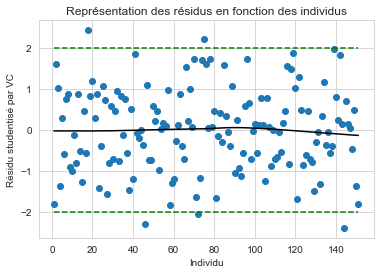

In [411]:
## Résidu studentisé
n = len(x_train_f)


from statsmodels.nonparametric.smoothers_lowess import lowess # pour le lissage
from statsmodels.stats.outliers_influence import OLSInfluence # pour récupérer les résidus studentisés

influ_f = OLSInfluence(model_final)
x = np.linspace(1,n,n)
y = np.repeat(2,n)
fig, ax = plt.subplots()

ax.scatter(x,influ_f.resid_studentized_external)
ax.plot(x,y,linestyle='dashed',color='green')
ax.plot(x,-y,linestyle='dashed',color='green')

filtered = lowess(influ_f.resid_studentized_external,x)
ax.plot(filtered[:,0],filtered[:,1],color='black')
ax.set_xlabel("Individu")
ax.set_ylabel("Résidu studentisé par VC")
ax.set_title("Représentation des résidus en fonction des individus") 

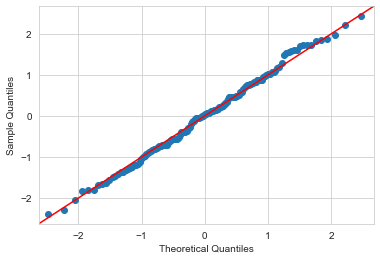

In [412]:
## QQplot
influ_f = OLSInfluence(model_final)
fig = sm.qqplot(influ_f.resid_studentized_external,line='45')

Text(0, 0.5, 'Résidus studentisés')

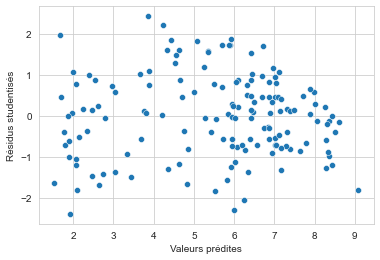

In [413]:
## Nuage des résidus
plt.figure()
ax = sns.scatterplot(model_final.fittedvalues, influ_f.resid_studentized_external)
ax.set_xlabel('Valeurs prédites')
ax.set_ylabel('Résidus studentisés')

**Ajustement sur les données d'apprentissage**

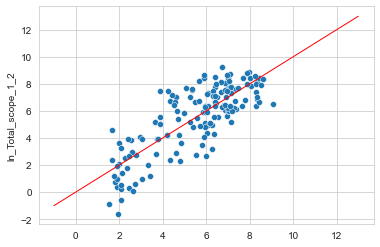

In [414]:
sns.scatterplot(model_final.fittedvalues, y_train_f)
plt.plot([-1, 12, 13], [-1, 12, 13], 'r-', lw=1) # Red straight line

**Prédiction**

Le modèle donne une erreur quadratique moyenne de  6.638


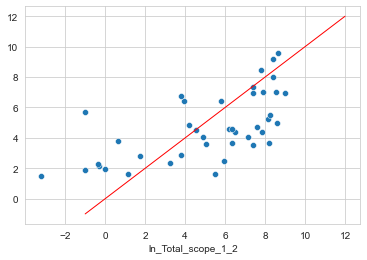

In [446]:
x_test_f = sm.add_constant(x_test)
x_test_f.drop(var_cor, axis=1, inplace=True)
x_test_f.drop(var_coef_null, axis=1, inplace=True)
x_test_f["Duree_Activite2"] = x_test_f["Duree_Activite"]**2

y_test_f = y_test
y_pred = model_final.predict(x_test_f)

sns.scatterplot(y_test_f, y_pred)
plt.plot([-1, 10, 12], [-1, 10, 12], 'r-', lw=1) # Red straight line
print('Le modèle donne une erreur quadratique moyenne de ', round(mean_squared_error(y_test_f, y_pred), 3))

In [447]:
model_lr = LinearRegression()
model_lr.fit(x_train_f, y_train_f)

LinearRegression()

## 7. Modèle Machine Learning

[Début de page](#table-des-matières)

Ici nous allons entrainer les modèles de machine learning sur toutes les variables issues du premier filtre (i.e  filtre selon la corrélation et l'anova).

### Preprocessing

In [ ]:
# Matrice de variables explicatives
x_prime = df_TPE[[*quanti_1er_select, *cat.columns]].copy()

In [ ]:
## Ajout de l'année de reporting pour comparaison avec le modèle niveau filière
x_prime['reporting_year'] = ASDES_2.loc[ASDES_2.classe == 'TPE/PME', 'reporting_year']
y_prime = df_TPE['ln_Total_scope_1_2']

# Echantillon pour comparaison avec Top Down : x_test_ml0, y_test_ml0
x_train_ml0, x_test_ml0, y_train_ml0, y_test_ml0 = train_test_split(x_prime, y_prime, test_size = 0.2, random_state = 2022)

In [445]:
# Pour centrer et réduire
StandC = StandardScaler() 
transform_var = make_column_transformer(
   (StandC, quanti_1er_select)
   )
# Fonction à appeler pour la transformation
def transform_x(x, list_quanti):
   """
   Cette fonction prend en entrée une base de données et la liste de variable quantitative
   qu'on souhaite centrée et réduire. Elle retourne un dataframe contenant les mêmes variables
   que la base d'entrée, à la différence que les colonnes spécifiées sont transformées.
   """
   ## Copie de la base avec les variables spécifiées
   x_copy = x[list_quanti].copy()
   ## Transformation de 
   x_copy = pd.DataFrame(transform_var.fit_transform(x_copy), columns=x_copy.columns)
   x_copy.reset_index(drop = True, inplace = True)
   ## Remplacer les anciennes colonnes par celles transformées
   x.drop(list_quanti, axis = 1, inplace=True)
   x.reset_index(drop = True, inplace = True)
   x[list_quanti] = x_copy.copy()
   return x

x_prime = transform_x(x_prime, quanti_1er_select)
## Ajout de l'année de reporting pour le modèle niveau filière
y_prime.reset_index(drop=True, inplace = True)
x_train_ml, x_test_ml, y_train_ml, y_test_ml= train_test_split(x_prime, y_prime, test_size = 0.2, random_state = 2022)
x_train_ml = x_train_ml.drop('reporting_year', axis  = 1)
x_test_ml = x_test_ml.drop('reporting_year', axis  = 1)


### Définition et entrainement des modèles

### Arbre de régression

In [175]:
Ar = make_pipeline(
                    PolynomialFeatures(1,include_bias=True),
                    SelectKBest(f_regression),
                    DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)
)

param_grid_ar = {
   'polynomialfeatures__degree':[1,2,3],
   'selectkbest__k':range(8,15),
   'decisiontreeregressor__max_depth' : (2,3,4,5,8,9,10),
   'decisiontreeregressor__min_samples_split' : [10,15,20],
   'decisiontreeregressor__max_leaf_nodes' : [10,15, 20]
}
grid_ar = GridSearchCV(Ar, param_grid_ar, cv = 5, scoring='neg_mean_squared_error')

In [176]:
grid_ar.fit(x_train_ml, y_train_ml)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=1)),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x000002241F75B370>)),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor(max_depth=4,
                                                              max_leaf_nodes=10,
                                                              min_samples_split=5))]),
             param_grid={'decisiontreeregressor__max_depth': (2, 3, 4, 5, 8, 9,
                                                              10),
                         'decisiontreeregressor__max_leaf_nodes': [10, 15, 20],
                         'decisiontreeregressor__min_samples_split': [10, 15,
                                                                    

In [177]:
model_ar = grid_ar.best_estimator_

### Elastic net

In [178]:
## Elastic net
Enet = make_pipeline(
                    PolynomialFeatures(1,include_bias=True),
                    SelectKBest(f_regression),
                    ElasticNet()
)

param_grid_enet = {'polynomialfeatures__degree':[1,2,3], 'selectkbest__k':range(8,15) }

grid_enet = GridSearchCV(Enet, param_grid_enet, cv = 5, scoring='neg_mean_squared_error')

In [179]:
grid_enet.fit(x_train_ml, y_train_ml)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=1)),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x000002241F75B370>)),
                                       ('elasticnet', ElasticNet())]),
             param_grid={'polynomialfeatures__degree': [1, 2, 3],
                         'selectkbest__k': range(8, 15)},
             scoring='neg_mean_squared_error')

In [180]:
model_enet = grid_enet.best_estimator_

### Random Forest

In [181]:
# Random Forest
RF = make_pipeline(
                    PolynomialFeatures(1,include_bias=False),
                    SelectKBest(f_regression, k=9),    
                    RandomForestRegressor()
)

In [182]:
param_grid_rf = {
            'polynomialfeatures__degree':[1,2,3],
            'selectkbest__k':range(8,15),
            'randomforestregressor__max_depth' : (2,4,8,10),
            'randomforestregressor__min_samples_split' : [10,15,20],
            'randomforestregressor__max_leaf_nodes' : [10,15, 20]     
}
grid_rf = GridSearchCV(RF, param_grid_rf, cv = 4,scoring='neg_mean_squared_error')

In [183]:
grid_rf.fit(x_train_ml, y_train_ml)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=1,
                                                           include_bias=False)),
                                       ('selectkbest',
                                        SelectKBest(k=9,
                                                    score_func=<function f_regression at 0x000002241F75B370>)),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             param_grid={'polynomialfeatures__degree': [1, 2, 3],
                         'randomforestregressor__max_depth': (2, 4, 8, 10),
                         'randomforestregressor__max_leaf_nodes': [10, 15, 20],
                         'randomforestregressor__min_samples_split': [10, 15,
                                                                      20],
                         'selectkbest

In [184]:
model_rf = grid_rf.best_estimator_

### XG Boost

In [185]:
## XG Boost
from xgboost.sklearn import XGBRegressor
Xg = make_pipeline(
   PolynomialFeatures(1,include_bias=True),
   SelectKBest(f_regression),
   XGBRegressor()
)

In [186]:
## Grid search
param_grid_xg = {
            'polynomialfeatures__degree':[1,2,3],
            'selectkbest__k':range(8,15),
            'xgbregressor__max_depth' : (2,4,8,10),
            

}
grid_xg = GridSearchCV(Xg, param_grid_xg, cv = 4,scoring='neg_mean_squared_error')

In [187]:
grid_xg.fit(x_train_ml, y_train_ml)

[20:06:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_leaf_nodes", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:06:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_leaf_nodes", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:06:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=1)),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x000002241F75B370>)),
                                       ('xgbregressor',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     enable_categorical=False,
                                                     gamma=None, gpu_id=Non...
                                                     reg_alpha=None,
                                

In [188]:
model_xg = grid_xg.best_estimator_

## 8. Evaluation des modèles

[Début de page](#table-des-matières)

### Paramètres de chaque modèle


In [189]:
listGrid = {
    'Elastic Net': grid_enet, 'DecisionTreeClassifier': grid_ar,
    'Random Forest': grid_rf, 'XG Boost': grid_xg 
           }

for  cle, valeur in listGrid.items():
    print('------------------------')
    print(cle)
    print('MSE cross validation', '---  ', -1*valeur.best_score_)
    print('Meilleurs paramètres', '---', valeur.best_params_)

------------------------
Elastic Net
MSE cross validation ---   5.131648164185546
Meilleurs paramètres --- {'polynomialfeatures__degree': 2, 'selectkbest__k': 11}
------------------------
DecisionTreeClassifier
MSE cross validation ---   3.3273752009644504
Meilleurs paramètres --- {'decisiontreeregressor__max_depth': 3, 'decisiontreeregressor__max_leaf_nodes': 10, 'decisiontreeregressor__min_samples_split': 10, 'polynomialfeatures__degree': 1, 'selectkbest__k': 11}
------------------------
Random Forest
MSE cross validation ---   3.2608262924733733
Meilleurs paramètres --- {'polynomialfeatures__degree': 1, 'randomforestregressor__max_depth': 8, 'randomforestregressor__max_leaf_nodes': 15, 'randomforestregressor__min_samples_split': 10, 'selectkbest__k': 10}
------------------------
XG Boost
MSE cross validation ---   3.625255680153967
Meilleurs paramètres --- {'polynomialfeatures__degree': 1, 'selectkbest__k': 9, 'xgbregressor__max_depth': 2, 'xgbregressor__max_leaf_nodes': 10, 'xgbreg

### Evaluation à l'aide du MSE et de la courbe d'apprentissage

In [416]:
def evaluation(model, titre, x_train, y_train, x_test, y_test):
    """La fonction donne la qualité d'ajustement du modèle en apprentissage et en test avec l'erreur quadratique
    moyen associée

    Args:
        model (modèle): modèle à évaluer
        titre (): Titre du modèle
        x_train (): données d'apprentissage du modèle
        y_train (_type_): données d'apprentissage du modèle
        x_test (_type_): données de test
        y_test (_type_): données de test
    """
    print('+===================================================+')
    print(titre)
    y_pred = model.predict(x_test)
    y_apprentissage = model.predict(x_train)

    fig = plt.figure(figsize=(10,10))
    fig.subplots_adjust(hspace=0.5, wspace=1)

    ## Ajustement des données d'apprentissage
    #plt.figure()
    fig.add_subplot(2, 2, 1)
    plt.title(titre+": Ajustement en apprentissage", size=14)
    plt.scatter(y_train, y_apprentissage)
    plt.ylabel('Y ajusté')
    plt.xlabel("Y apprentissage")
    plt.plot([-1, 10, 12], [-1, 10, 12], 'r-', lw=1)

    ## Ajustement des données test
    #plt.figure()
    fig.add_subplot(2, 2, 2)
    plt.title(titre+": Ajustement en test", size=14)
    plt.scatter(y_test, y_pred)
    plt.ylabel('Y ajusté')
    plt.xlabel("Y apprentissage")
    plt.plot([-1, 10, 12], [-1, 10, 12], 'r-', lw=1)
    print("MSE: ", mean_squared_error(y_test, y_pred))
    
    fig.add_subplot(2, 2, 3)
    N, train_score, val_score = learning_curve(model, x_train, y_train, cv=4, 
    scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1,1,5))
    #plt.figure()
    plt.title(titre+": Evolution de l'opposé du MSE entre validation et train ", size=14)
    plt.plot(N, train_score.mean(axis =1), label = 'train')
    plt.plot(N, val_score.mean(axis =1), label = 'validation')
    plt.legend()

**Régression linéaire**

+===================================================+
Regression Linéaire
MSE:  6.638452768128361


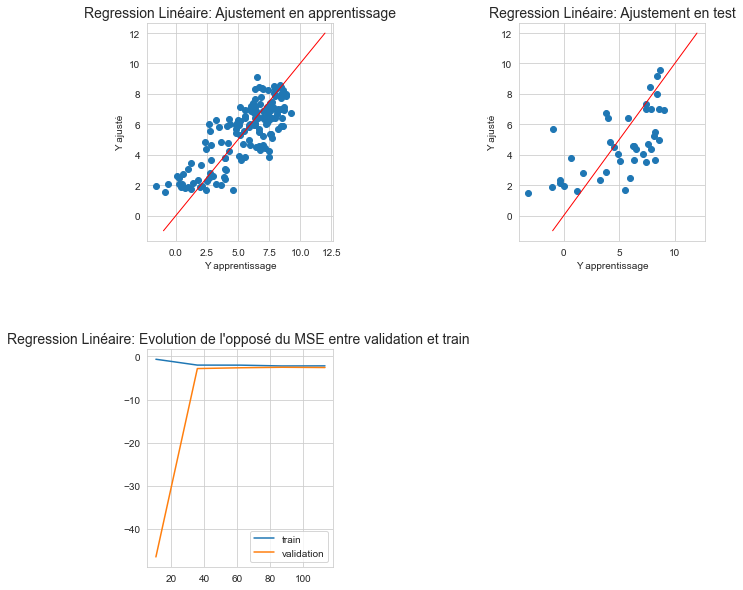

In [448]:
evaluation(model_lr, 'Regression Linéaire', x_train_f, y_train_f, x_test_f, y_test_f)

**Elastic Net**

In [418]:
grid_enet.best_params_

{'polynomialfeatures__degree': 2, 'selectkbest__k': 11}

+===================================================+
Elastic Net
MSE:  8.561822057426433


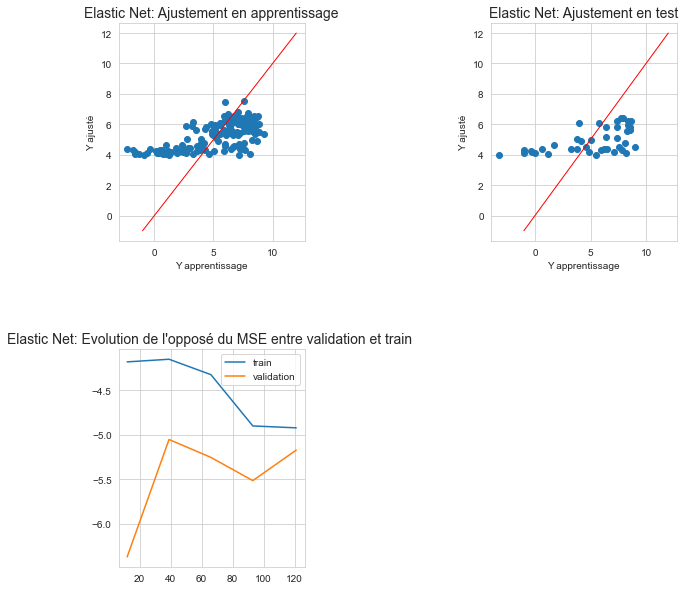

In [449]:
evaluation(model_enet, 'Elastic Net', x_train_ml, y_train_ml, x_test_ml, y_test_ml)

**Arbre de décision**

+===================================================+
Arbre de régression
MSE:  8.314604375809706


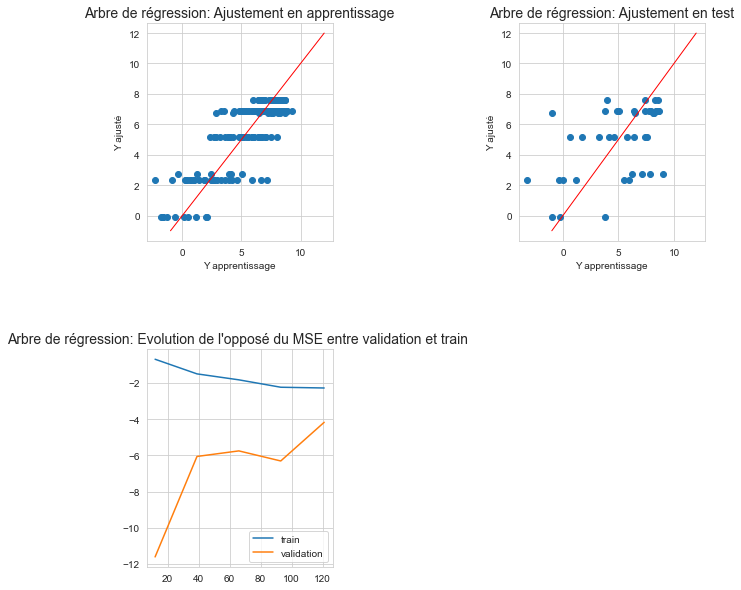

In [450]:
evaluation(model_ar, "Arbre de régression", x_train_ml, y_train_ml, x_test_ml, y_test_ml)

**Random Forest**

+===================================================+
Random Forest
MSE:  6.546168909974577


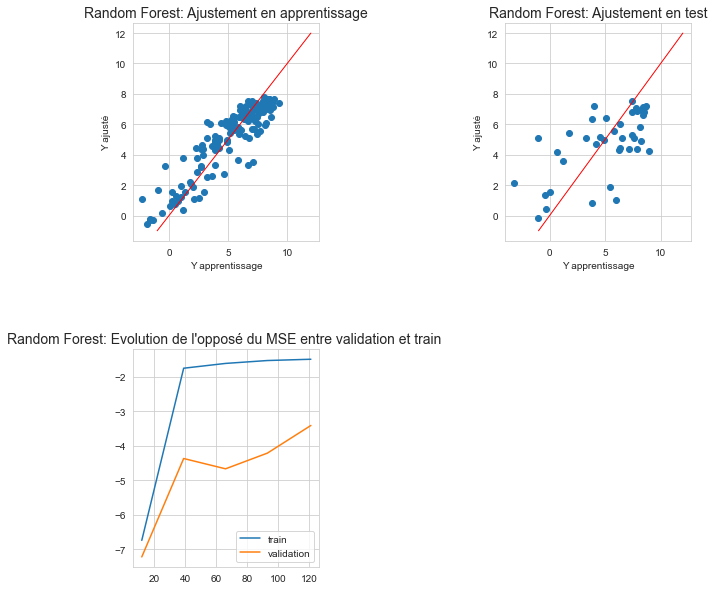

In [451]:
evaluation(model_rf, 'Random Forest',x_train_ml, y_train_ml, x_test_ml, y_test_ml)

**XG boost**

+===================================================+
XGboost
MSE:  8.891531018204812
[00:00:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_leaf_nodes", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:00:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_leaf_nodes", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:00:37] WARNING: C:/Use

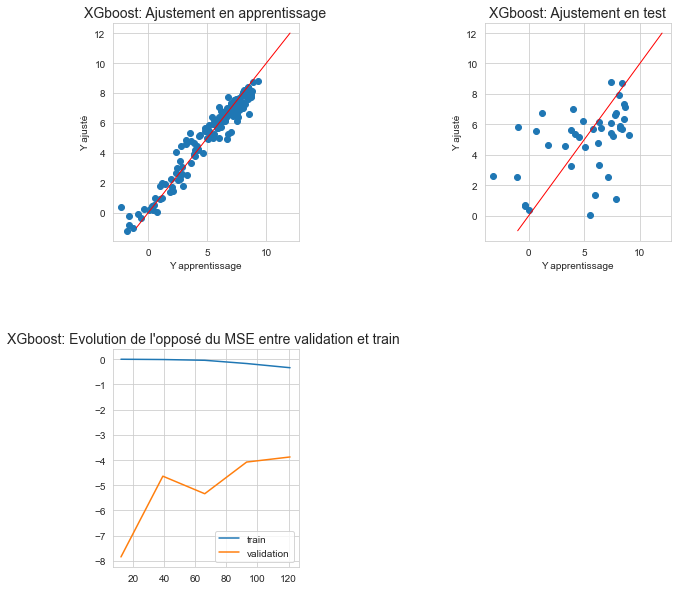

In [452]:
warnings.filterwarnings("ignore")
evaluation(model_xg, "XGboost", x_train_ml, y_train_ml, x_test_ml, y_test_ml)

## 9. Conclusion Modèle classique

[Début de page](#table-des-matières)

Cette première modélisation utilisant les entreprises comme unité statistique aboutie sur le choix de la régression linéaire comme meilleur modèle pour la modélisation des émissions de GES des TPE/PME. Comme présenté ci-dessous ce choix est motivé par deux choses:
- Erreur quadratique moyenne faible;
- Niveau de surapprentissage faible également.

Ce modèle sera donc utilisé comme référence pour comparer les erreurs de l'approche top down.

## 10. Prédiction approche TOP DOWN

[Début de page](#table-des-matières)

### Modèle niveau secteur

In [453]:
# Importation de la base Filière
base_filiere = pd.read_csv("bdd/Base_finale/base_topdown.csv")
base_filiere.drop("energie_secteur", axis=1, inplace=True)

In [455]:
# Préparation de la  base x_test niveau entreprise
dict_rename = { 
   "annee_secteur": "reporting_year",
   "FraisPersonnel_secteur": "Wages_and_salaries",
   "Salaries_tps_plein_secteur": "Average_number_of_employees",
   "CA_exportation_secteur": 'Net_turnover_related_to_exports',
   "CA_hors_taxe_secteur": "NetTurnover",
   "EBE_secteur": "EBITDA_margin_",
   "VA_et_autres_prdts_charges_secteur" : "Added_value",
   "agri_indusmanu_secteur": "Filiere_indus_manu",
   "autre_secteur" : "Filiere_Autre",
   "transport_secteur": "Filiere_transport"
}

base_filiere.rename(columns=dict_rename, inplace=True)

In [456]:
# Echantillon test et train
x_train_filiere, x_test_filiere, y_train_filiere, y_test_filiere = train_test_split(base_filiere.drop('eges_secteur', axis=1),
base_filiere['eges_secteur'], test_size = 0.2, random_state = 2022)

In [457]:
## Appel du modèle filière
dtr = DecisionTreeRegressor(max_depth = 4,
random_state=1, splitter='best')

dtr.fit(x_train_filiere, y_train_filiere)

DecisionTreeRegressor(max_depth=4, random_state=1)

### Modèle ratio

In [458]:
## Importation de la base ratio
base_ratio = pd.read_csv('bdd/base_finale/base_ratio.csv')

In [459]:
# Meilleur division de filière:
base_ratio[["Autre","construction","dechets",
"indus_manu",
"tertiaire",
"transport"]] = pd.get_dummies(base_ratio["secteur_secteur"])

base_ratio.drop("secteur_secteur", axis=1, inplace= True)

In [460]:
## Variable explicative
variables_lineare = [
 'reporting_year',
 'CA_rate',
 'NbEmploye_rate',
 'CA_export_rate',
 'construction',
 'dechets',
 'indus_manu',
 'Autre']

In [461]:
# Conversion de la variable en log et de la variable eges secteur en tonne
base_ratio['ges_rate'] = np.log(base_ratio['ges_rate'])

base_ratio['eges_secteur'] = np.log(base_ratio['eges_secteur']*1000000)

In [462]:
# Division de la base en apprentissage et test
x_train_ratio, x_test_ratio, y_train_ratio, y_test_ratio = train_test_split(base_ratio[variables_lineare],
base_ratio['ges_rate'], test_size = 0.2, random_state = 2022)

In [464]:
## Modèle Ridge
ridge_ratio = Ridge()

ridge_ratio.fit(x_train_ratio, y_train_ratio)

Ridge()

## 11. Enregistrement des prédictions pour la comparaison

[Début de page](#table-des-matières)

**MSE Régression Linéaire Classique**

In [465]:
y_test_classique = model_lr.predict(x_test_f)
mean_squared_error(y_test_f, y_test_classique)

6.638452768128361

**Prédiction et MSE du modèle niveau filière**

In [468]:
y_top_down = np.log(dtr.predict(x_test_ml0[dict_rename.values()]))

In [469]:
mean_squared_error(y_test_ml, y_top_down)

10.830153595341582

**Prédiction et MSE modèle ratio**

In [479]:
## Prédiction du ratio Y/Ysecteur sur les données tests
y_ratio_predict = ridge_ratio.predict(x_test_ratio)
mean_squared_error(y_test_ratio, y_ratio_predict)

8.423282454480711

**Regroupement des prédictions**

On regroupe ensuite les valeurs prédites afin d'y effectuer des tests statistiques pour voir si les modèles classiques s'écartent trop du modèle linéaire

In [477]:
df_predict_reg =  pd.DataFrame()
df_predict_reg['y_true_reg'] = y_test_f
df_predict_reg['y_classique'] = y_test_classique
df_predict_reg.to_csv("bdd/Base_finale/df_predict_reg.csv", index=False)


In [478]:
df_comparaison = pd.DataFrame()
df_comparaison['y_true'] = y_test_ml
df_comparaison['y_filiere'] = y_top_down
df_comparaison['y_ratio_test'] = y_test_ratio
df_comparaison['y_ratio_predict'] = y_ratio_predict
df_comparaison.to_csv("bdd/Base_finale/df_comparaison.csv", index=False)